<a href="https://colab.research.google.com/github/Koroteika/University/blob/main/Task/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%9610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №3. Работа с растровыми данными в Rasterio**

---

**Данные для обработки:**

- Одноканальное изображение (ЦМР): https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
- Мультиспектральное изображение (Landsat): https://github.com/opengeos/datasets/releases/download/raster/cog.tif

In [1]:
# Загрузка библиотек
%%capture
%pip install rasterio fiona folium matplotlib mapclassify

In [2]:
# Импорт необходимых библиотек
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as  plt

### **Задание 1. Чтение и исследование растровых данных**



1. Откройте одноканальное изображение ЦМР с использованием `rasterio`.


In [3]:
# Ваш код
raster_path = ("https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif")
src = rasterio.open(raster_path)

print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


2. Извлеките и выведите метаданные растра, включая СК, разрешение, границы, количество каналов и типы данных.


In [4]:
# Ваш код
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

3. Отобразите ширину и высоту растра, а также типы данных пикселей, чтобы понять размеры сетки и структуру данных.

In [5]:
# Ваш код
print(src.width)# ширина
print(src.height)# высота

4269
3113


---



### **Задание 2. Визуализация и манипулирование растровыми каналами**



1. Визуализируйте одноканальное изображение ЦМР с использованием пользовательской цветовой карты (например, cmap='terrain').


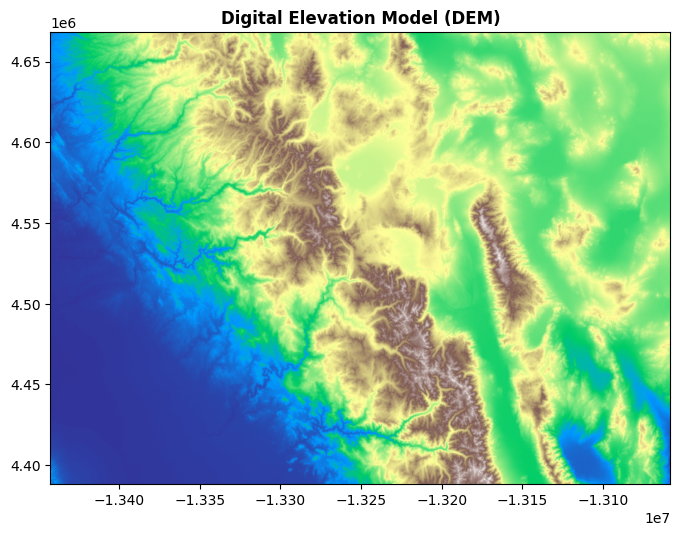

In [6]:
# Ваш код
# Создаем новую фигуру и ось с размером 8x8
fig, ax = plt.subplots(figsize=(8, 8))

rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
plt.show()


2. Откройте мультиспектральное изображение и визуализируйте первый канал с использованием подходящей цветовой карты.


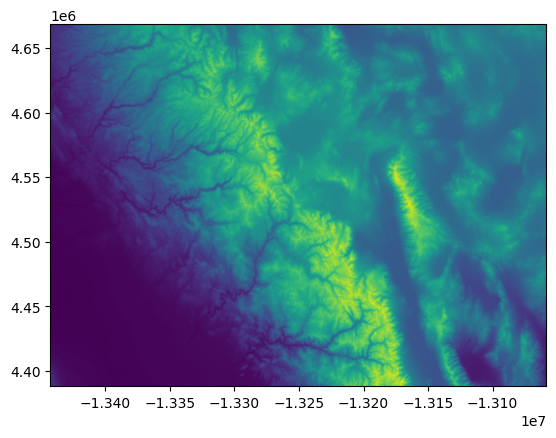

<Axes: >

In [7]:
# Ваш код
# Используем функцию show из модуля rasterio.plot для отображения растра
# Передаем кортеж, содержащий объект растра (src) и номер канала (1)
# Это отобразит первый канал растра
rasterio.plot.show((src, 1))

3. Объедините несколько каналов из мультиспектрального изображения (например, Красный, Зеленый и Синий) и совместите их в один массив для создания RGB-композитного изображения.

In [8]:
# Ваш код
raster_path_landsat = ("https://github.com/opengeos/datasets/releases/download/raster/cog.tif")
src_land = rasterio.open(raster_path_landsat)

print(src_land)


<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/cog.tif' mode='r'>


In [9]:
src_land.meta # матаданные растра

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 343,
 'height': 206,
 'count': 4,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
        0.0, -8.983152841195215e-05, 53.41634207654228)}

In [10]:
src_land.descriptions

(None, None, None, None)

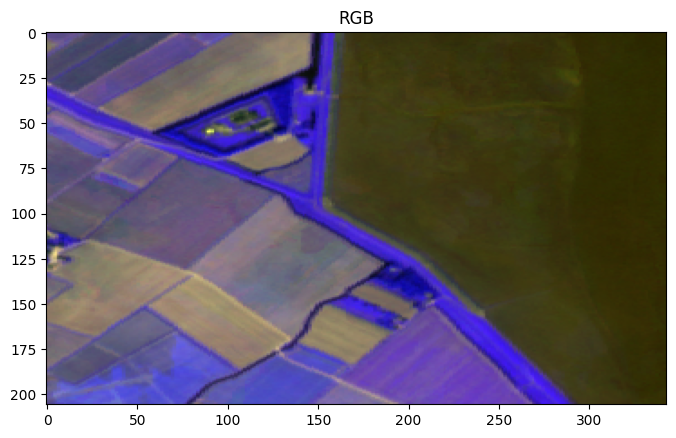

In [11]:
# Функция для нормализации канала в диапазон от 0 до 1
def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm
# Чтение каналов
channels = [src_land.read(i) for i in range(1, src_land.count + 1)]

# Нормализация каналов
for i in range(len(channels)):
    channels[i] = normalize(channels[i])

# Объединяем каналы в один массив, используя метод np.dstack,
# и ограничиваем значения в каждом канале от 0 до 1
rgb = np.dstack((channels[1],channels[2],channels[3]))
# Создаем новую фигуру с размером 8x8 дюймов
plt.figure(figsize=(8, 8))

# Отображаем полученный композит (псевдоцветное изображение)
plt.imshow(rgb)

# Устанавливаем заголовок графика
plt.title("RGB")

# Отображаем созданный график
plt.show()

---



### **Задание 3. Обрезка растра с использованием индексации массива**



1. Откройте мультиспектральное изображение и обрежьте его с использованием спискового среза (указав диапазоны строк и столбцов).


In [12]:
# Ваш код
data = src_land.read()
data.shape

# Создаем подмножество данных, вырезая фрагмент изображения:
# - берем все каналы [:, ...]
# - строки с 900 по 1400
# - столбцы с 700 по 1200
# Также масштабируем значения, чтобы они были в диапазоне от 0 до 1
subset = data[:, 100:200, 200:300]
# Функция для нормализации канала в диапазон от 0 до 1
def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm

for i in range(subset.shape[0]):
    subset[i] = normalize(subset[i])

rgb_subset = np.dstack((subset[1], subset[2], subset[3]))
# Выводим размерность полученного псевдо-RGB изображения
rgb_subset.shape

(100, 100, 3)

2. Визуализируйте обрезанную часть изображения с использованием matplotlib, чтобы убедиться в корректном результате.


>*Примечание:*
>
> При работе с многоканальными растровыми изображениями, особенно в формате COG.TIFF (Cloud Optimized GeoTIFF), может возникнуть проблема с некорректным отображением псевдоцветного изображения. Это связано с тем, что разные каналы могут иметь различные диапазоны значений пикселей.
>
> Для корректной визуализации на шаге 2 необходимо применить нормализацию к каждому каналу перед отображением.



Включите следующую функцию в ваш код:

```python
# Функция для нормализации канала в диапазон от 0 до 1
def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm
```

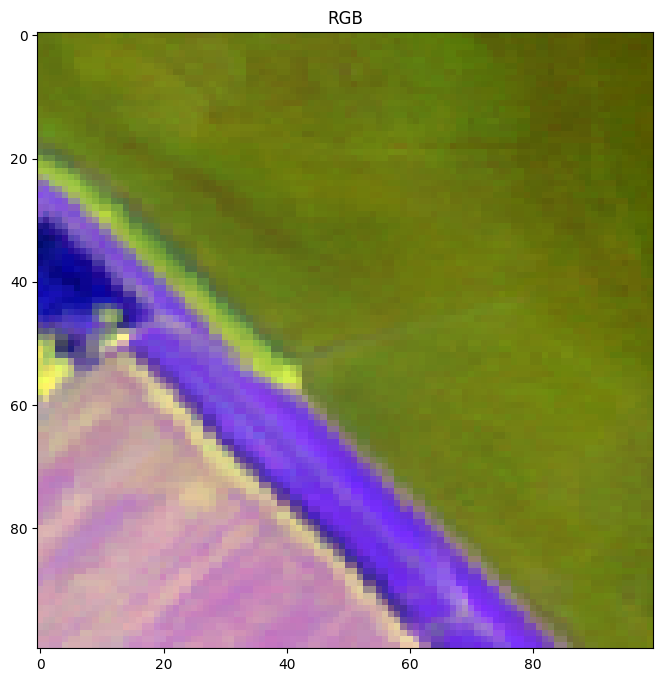

In [13]:
# Ваш код
plt.figure(figsize=(8, 8))
plt.imshow(rgb_subset)
plt.title("RGB")
plt.show()

3. Сохраните обрезанное подмножество растра в новый файл с именем `clipped_multispectral.tif`.

In [14]:
# Ваш код
from rasterio.transform import Affine

out_path = "clipped_multispectral.tif"

with rasterio.open(src_land.name) as src:
    new_transform = src.transform * Affine.translation(200, 100)

    with rasterio.open(
        out_path,
        "w",
        driver="GTiff",
        height=subset.shape[1],
        width=subset.shape[2],
        count=subset.shape[0],
        dtype=subset.dtype,
        crs=src.crs,
        transform=new_transform,
        compress="lzw",
    ) as dst:
        dst.write(subset)


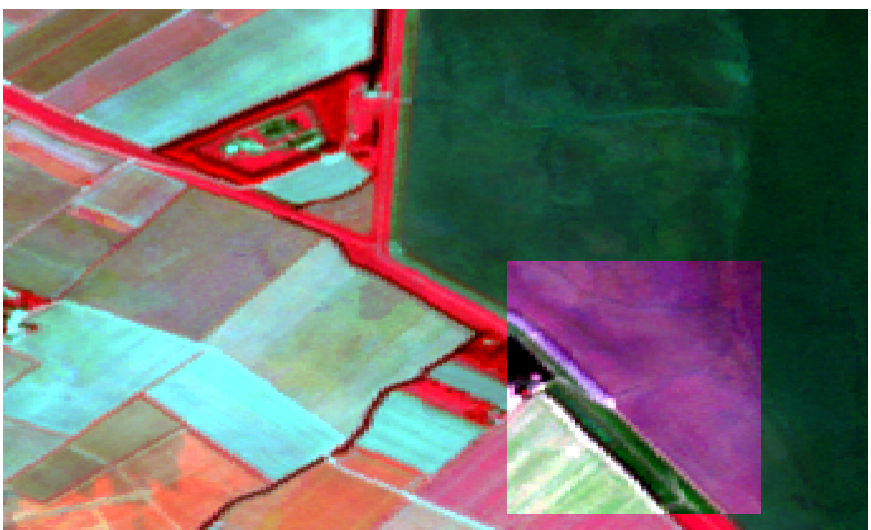

---



### **Задание 4. Вычисление NDWI (калькуляция каналов)**



1. Откройте мультиспектральное изображение и извлеките каналы Green (Зеленый) и Ближний инфракрасный (NIR).


In [15]:
# Ваш код
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
src_landsat = rasterio.open(raster_path)
src_landsat.descriptions



('SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7')

2. Вычислите Нормализованный разностный водный индекс ([NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index)) по формуле:

    NDWI = (Green - NIR) / (Green + NIR)

In [16]:
# Считываем пятый канал (NIR) из растра src
nir_band = src_landsat.read(5)

# Читаем четвертый канал (красный) из растра src
red_band = src_landsat.read(4)

# Читаем третий канал (зеленый) из растра src
green_band = src_landsat.read(3)
# Ваш код
# Расчет NDVI: NDVI = (NIR - Red) / (NIR + Red)
ndvi = (nir_band - red_band) / (nir_band + red_band)

# Ограничиваем значения NDVI от -1 до 1
ndvi = ndvi.clip(-1, 1)

/tmp/ipython-input-4114427193.py:11: RuntimeWarning: invalid value encountered in subtract
  ndvi = (nir_band - red_band) / (nir_band + red_band)


3. Визуализируйте результат NDWI с использованием цветовой карты, подходящей для воды (например, cmap='Blues'), чтобы выделить водные объекты.


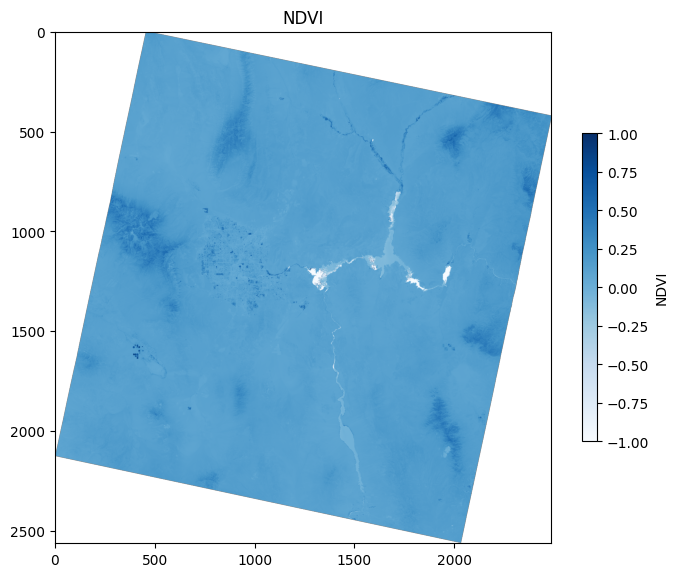

In [17]:
# Ваш код
# Создаем новую фигуру с размером 8x8 дюймов
plt.figure(figsize=(8, 8))

# Отображаем NDVI с использованием цветовой карты RdYlGn, устанавливая минимальное и максимальное значения
plt.imshow(ndvi, cmap="Blues", vmin=-1, vmax=1)

# Добавляем цветовую шкалу с меткой "NDVI" и уменьшаем ее размер до 50%
plt.colorbar(label="NDVI", shrink=0.5)

# Устанавливаем заголовок графика
plt.title("NDVI")

# Отображаем созданный график
plt.show()



4. Сохраните полученное изображение NDWI как новый растровый файл с именем ndwi.tif.

In [22]:
# Ваш код
# Открываем растр по указанному пути в контекстном менеджере
with rasterio.open(raster_path) as src:
    # Получаем профиль растра, который содержит метаданные
    profile = src.profile

# Обновляем профиль растра, устанавливая тип данных на float32, количество полос на 1 и сжатие LZW
profile.update(dtype=rasterio.float32, count=1, compress="lzw")

# Указываем путь к выходному файлу растра с именем "ndvi.tif"
output_raster_path = "ndvi.tif"

# Открываем файл для записи с использованием параметров профиля
with rasterio.open(output_raster_path, "w", **profile) as dst:
    # Записываем данные NDVI в первый канал выходного растра
    dst.write(ndvi, 1)

# Выводим сообщение о том, что данные растра были записаны в указанный файл
print(f"Растровые данные были записаны в файл: {output_raster_path}")

Растровые данные были записаны в файл: ndvi.tif


---

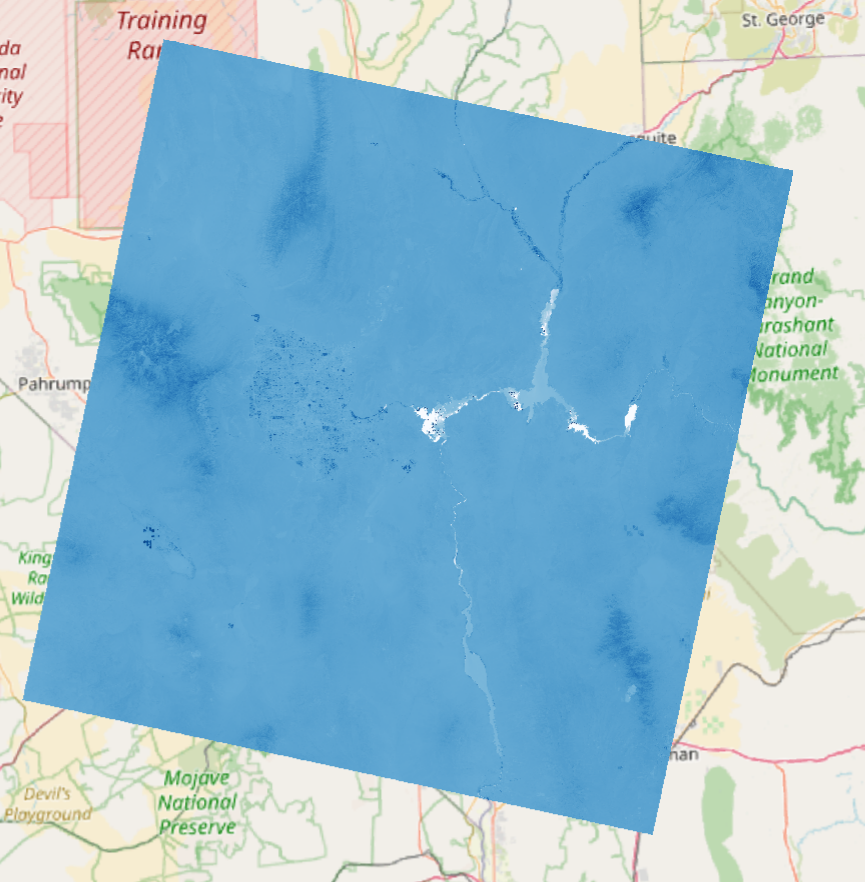



### **Задание 5. Перепроецирование растровых данных**



1. Перепроецируйте одноканальный растр ЦМР из его исходной СК в EPSG:4326 (WGS 84) с использованием функции `rasterio.warp.reproject`.


In [23]:
# Ваш код
# Импортируем необходимые функции для перепроецирования растра
from rasterio.warp import calculate_default_transform, reproject, Resampling

2. Сохраните перепроецированный растр в новый файл GeoTIFF с именем `reprojected_dem.tif`.


In [24]:
# Ваш код
# Задаем пути к файлам и целевую систему координат
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
dst_crs = "EPSG:3857"  # Целевая система координат - проекция Web Mercator
output_reprojected_path = "reprojected_dem.tif"

# Открываем исходный растр и вычисляем параметры трансформации
with rasterio.open(raster_path) as src:
    # Рассчитываем параметры трансформации для новой проекции
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )

    # Копируем и обновляем метаданные для нового файла
    profile = src.profile
    profile.update(crs=dst_crs, transform=transform, width=width, height=height)

    # Создаем новый файл и перепроецируем данные
    with rasterio.open(output_reprojected_path, "w", **profile) as dst:
        # Перепроецируем каждый канал растра
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,  # Используем метод ближайшего соседа
            )

# Выводим сообщение об успешном сохранении
print(f"Перепроецированный растр сохранен как: {output_reprojected_path}")

Перепроецированный растр сохранен как: reprojected_dem.tif


3. Визуализируйте как исходный, так и перепроецированный наборы данных ЦМР, чтобы сравнить, как перепроецирование влияет на пространственное покрытие и разрешение.

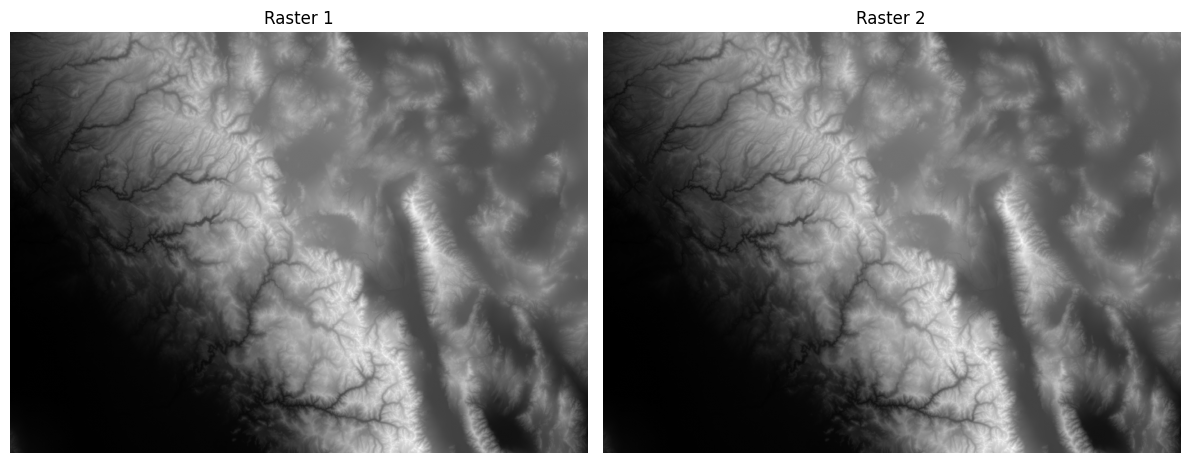

In [25]:
# Ваш код
# Открываем растр
with rasterio.open("https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif") as src1:
    img1 = src1.read(1)

with rasterio.open("reprojected_dem.tif") as src2:
    img2 = src2.read(1)

# Визуализация рядом
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img1, cmap="gray")
axes[0].set_title("Raster 1")
axes[0].axis("off")

axes[1].imshow(img2, cmap="gray")
axes[1].set_title("Raster 2")
axes[1].axis("off")

plt.tight_layout()
plt.show()

---